In [1]:
import matplotlib.pyplot as plt
import pandas as pd

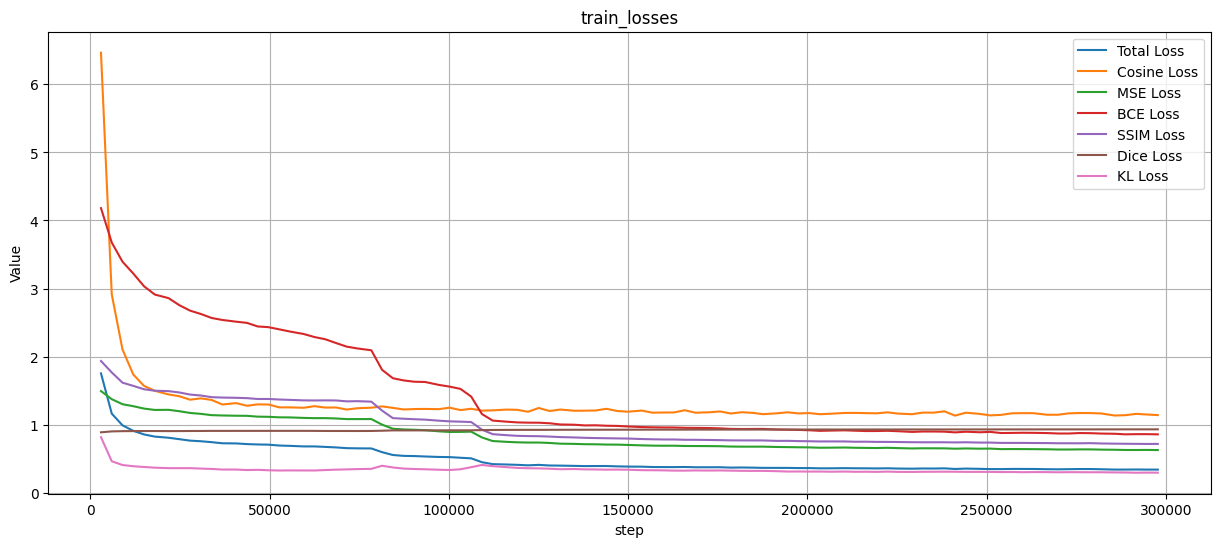

In [2]:
#train_losses
with open('./train_losses_log.log', 'r') as file:
    train_log_data = file.read()

#先分割每一行資料
train_log_data=train_log_data.splitlines()
#提取對應的數值
steps=[]
train_losses_total = []
train_losses_cos = []
train_losses_mse = []
train_losses_bce = []
train_losses_dice = []
train_losses_ssim = []
train_losses_kl = []
line_count=0
for line in train_log_data:
    line_count += 1
    #第四行開始才是要提取的資料內容
    if line_count >4:
        line_dict = line.split(':', 1)[1].strip().strip('{}')
        step=line.split(':', 1)[0].split()[3]
        steps.append(int(step))

        #將每種數據分割出來
        datas=line_dict.split(',')
        #由於最後一個資料後面有','，所以分割出來多一個，因此要去掉空白的資料
        datas = [data for data in datas if data.strip()]

        for data in datas:
            key, value = data.split(':')
            key = key.strip().strip("'") #去掉引號
            value = float(value.strip())
            # 根據 key 將數值加入對應的陣列
            if key == 'total_loss':
                train_losses_total.append(value)
            elif key == 'cos':
                train_losses_cos.append(value)
            elif key == 'mse':
                train_losses_mse.append(value)
            elif key == 'bce':
                train_losses_bce.append(value)
            elif key == 'dice':
                train_losses_dice.append(value)
            elif key == 'ssim':
                train_losses_ssim.append(value)
            elif key == 'kl':
                train_losses_kl.append(value)

plt.figure(figsize=(15, 6))
plt.plot(steps, train_losses_total, label='Total Loss')
plt.plot(steps, train_losses_cos, label='Cosine Loss')
plt.plot(steps, train_losses_mse, label='MSE Loss')
plt.plot(steps, train_losses_bce, label='BCE Loss')
plt.plot(steps, train_losses_dice, label='SSIM Loss')
plt.plot(steps, train_losses_ssim, label='Dice Loss')
plt.plot(steps, train_losses_kl, label='KL Loss')
            
plt.title('train_losses')
plt.xlabel('step')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.show()

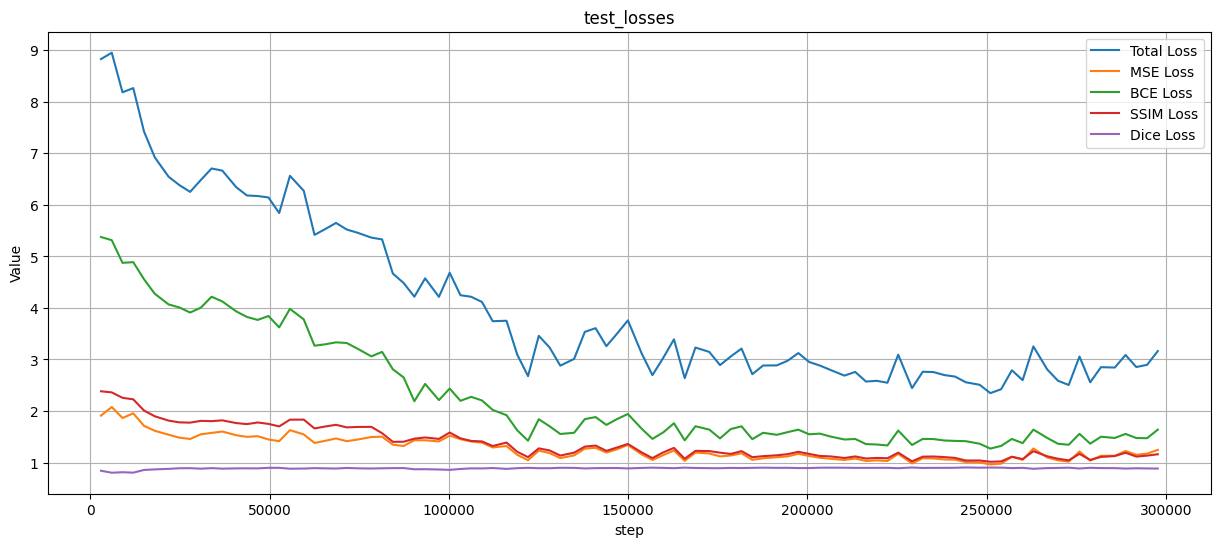

In [3]:
#test_losses
with open('./test_losses_log.log', 'r') as file:
    test_log_data = file.read()

#先分割每一行資料
test_log_data = test_log_data.splitlines()
#提取對應的數值
steps = []
test_losses_total = []
# test_losses_cos = []
test_losses_mse = []
test_losses_bce = []
test_losses_dice = []
test_losses_ssim = []
# test_losses_kl = []
line_count = 0
for line in test_log_data:
    line_count += 1
    #第四行開始才是要提取的資料內容
    if line_count > 4:
        line_dict = line.split(':', 1)[1].strip().strip('{}')
        step = line.split(':', 1)[0].split()[3]
        steps.append(int(step))

        #將每種數據分割出來
        datas = line_dict.split(',')
        #由於最後一個資料後面有','，所以分割出來多一個，因此要去掉空白的資料
        datas = [data for data in datas if data.strip()]

        for data in datas:
            key, value = data.split(':')
            key = key.strip().strip("'")  # 去掉引號
            value = float(value.strip())
            # 根據 key 將數值加入對應的陣列
            if key == 'total_loss':
                test_losses_total.append(value)
            # elif key == 'cos':
            #     test_losses_cos.append(value)
            elif key == 'mse':
                test_losses_mse.append(value)
            elif key == 'bce':
                test_losses_bce.append(value)
            elif key == 'dice':
                test_losses_dice.append(value)
            elif key == 'ssim':
                test_losses_ssim.append(value)
            # elif key == 'kl':
            #     test_losses_kl.append(value)

plt.figure(figsize=(15, 6))
plt.plot(steps, test_losses_total, label='Total Loss')
# plt.plot(steps, test_losses_cos, label='Cosine Loss')
plt.plot(steps, test_losses_mse, label='MSE Loss')
plt.plot(steps, test_losses_bce, label='BCE Loss')
plt.plot(steps, test_losses_dice, label='SSIM Loss')
plt.plot(steps, test_losses_ssim, label='Dice Loss')
# plt.plot(steps, test_losses_kl, label='KL Loss')

plt.title('test_losses')
plt.xlabel('step')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.show()


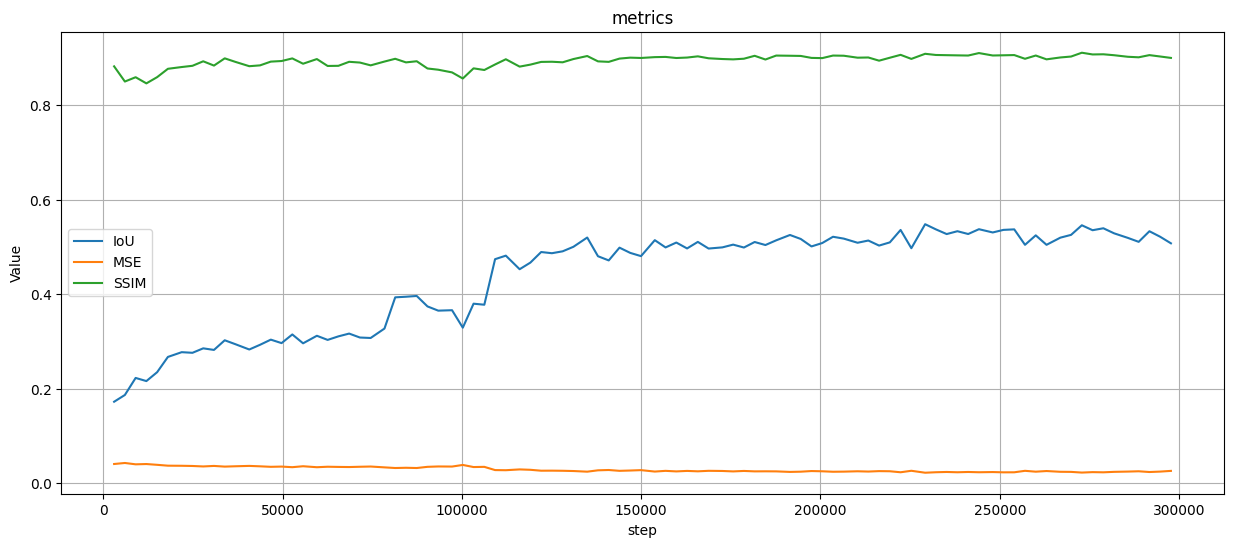

In [4]:
# metrics
with open('./metrics_log.log', 'r') as file:
    metrics_log_data = file.read()

# 先分割每一行資料
metrics_log_data = metrics_log_data.splitlines()
# 提取對應的數值
steps = []
IoU = []
mse = []
ssim = []
line_count = 0
for line in metrics_log_data:
    line_count += 1
    # 第四行開始才是要提取的資料內容
    if line_count > 4:
        line_dict = line.split(':', 1)[1].strip().strip('{}')
        step = line.split(':', 1)[0].split()[3]
        steps.append(int(step))

        # 將每種數據分割出來
        datas = line_dict.split(',')
        # 由於最後一個資料後面有','，所以分割出來多一個，因此要去掉空白的資料
        datas = [data for data in datas if data.strip()]

        for data in datas:
            key, value = data.split(':')
            key = key.strip().strip("'")  # 去掉引號
            value = float(value.strip())
            # 根據 key 將數值加入對應的陣列
            if key == 'IoU':
                IoU.append(value)
            elif key == 'mse':
                mse.append(value)
            elif key == 'ssim':
                ssim.append(value)

plt.figure(figsize=(15, 6))
plt.plot(steps, IoU, label='IoU')
plt.plot(steps, mse, label='MSE')
plt.plot(steps, ssim, label='SSIM')

plt.title('metrics')
plt.xlabel('step')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.show()


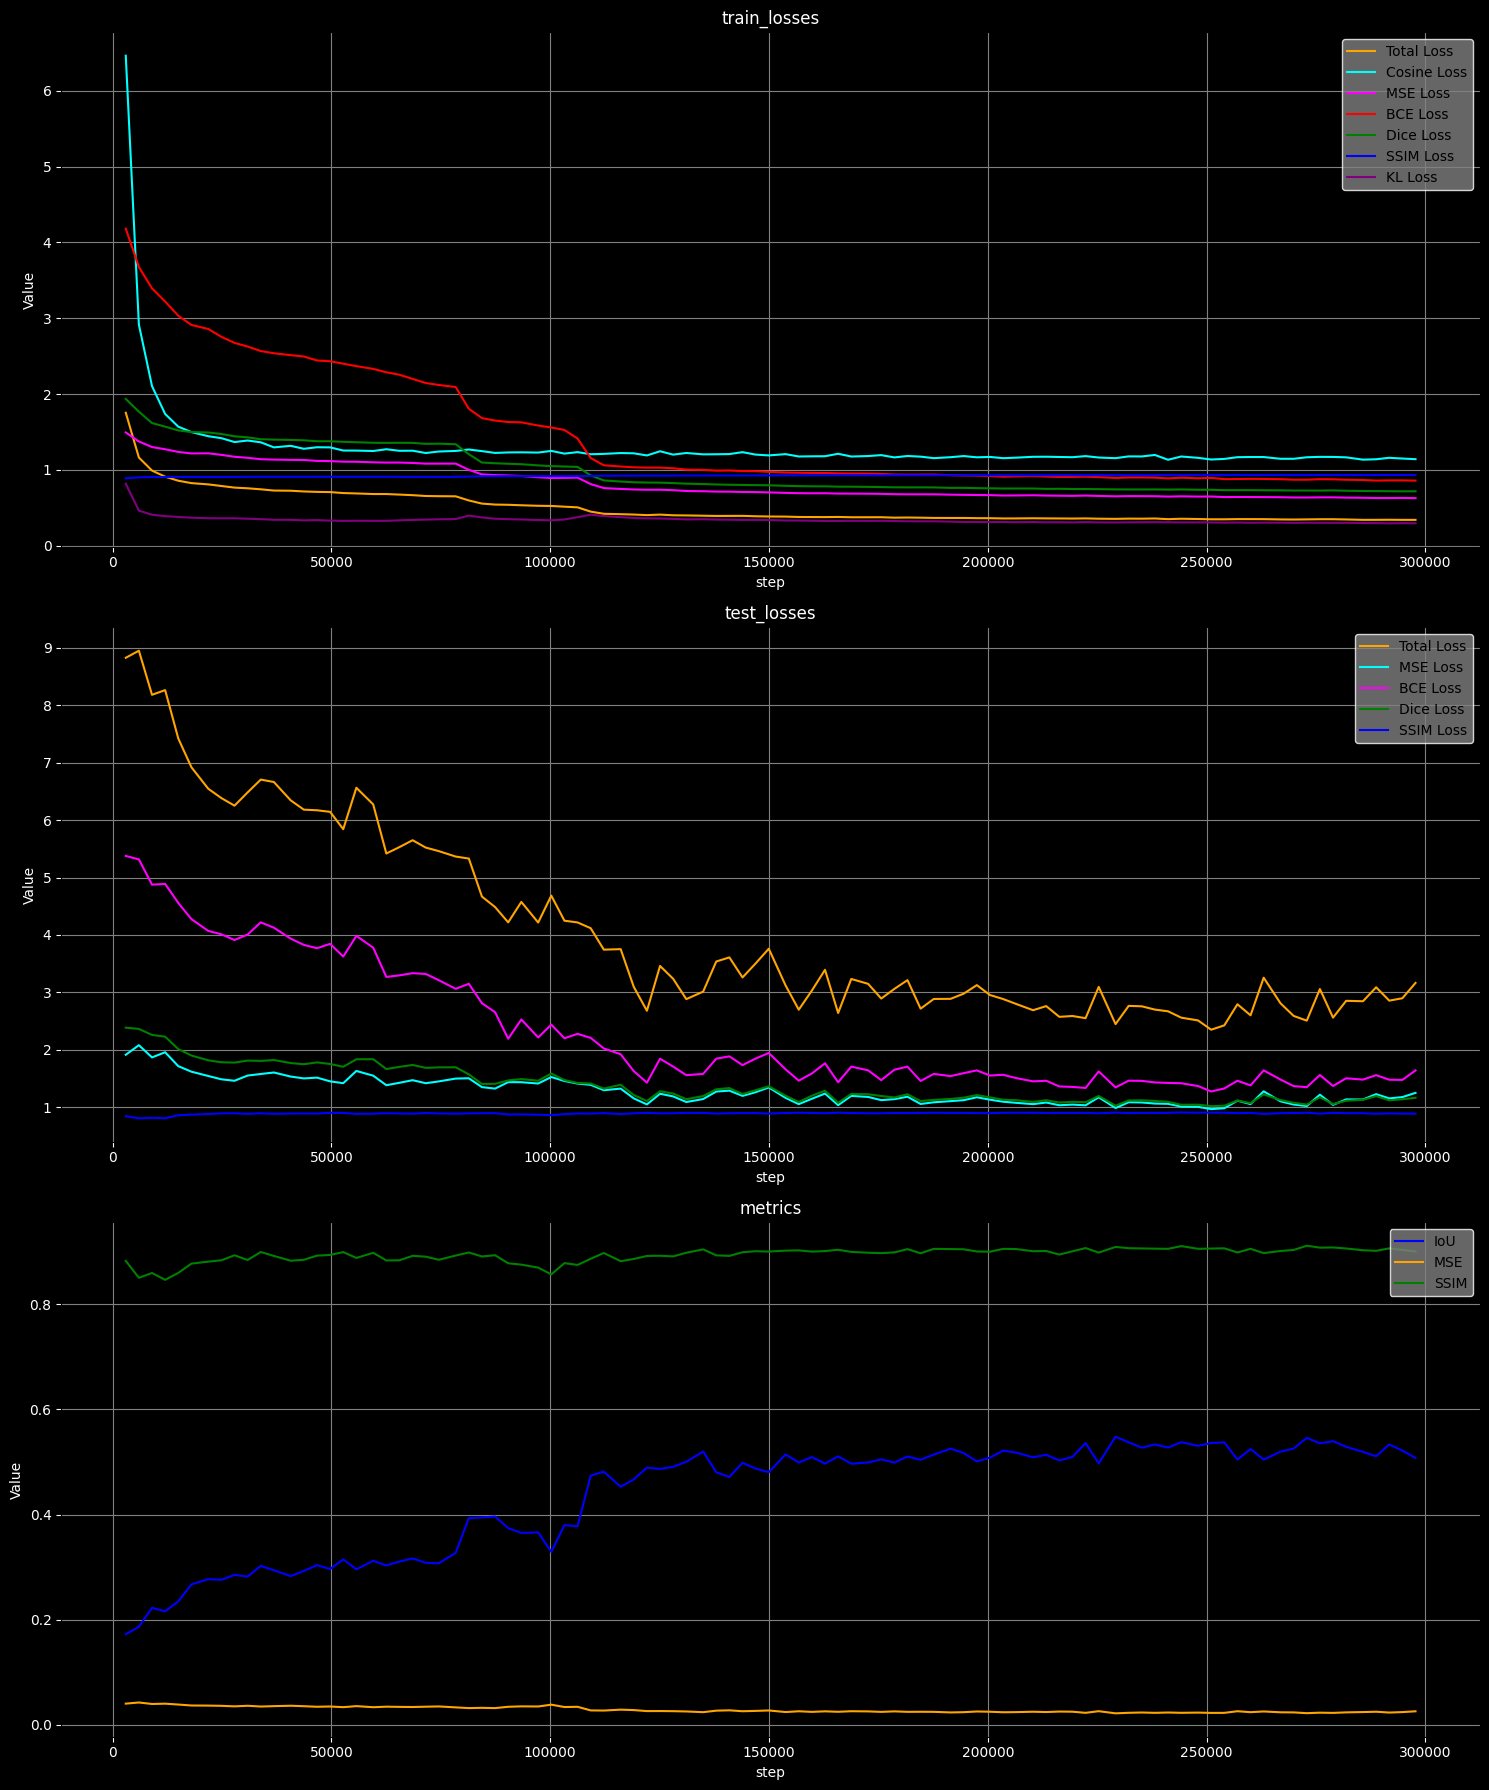

In [8]:
# 創建一個 3 行 1 列的子圖
fig, axs = plt.subplots(3, 1, figsize=(15, 18), facecolor='black')

# 設置每個子圖的背景顏色和網格顏色
for ax in axs:
    ax.set_facecolor('black')
    ax.grid(color='gray')  # 設置網格顏色
    ax.tick_params(axis='x', colors='white')  # X軸顏色
    ax.tick_params(axis='y', colors='white')  # Y軸顏色

# train_losses
axs[0].plot(steps, train_losses_total, label='Total Loss', color='orange')
axs[0].plot(steps, train_losses_cos, label='Cosine Loss', color='cyan')
axs[0].plot(steps, train_losses_mse, label='MSE Loss', color='magenta')
axs[0].plot(steps, train_losses_bce, label='BCE Loss', color='red')
axs[0].plot(steps, train_losses_dice, label='Dice Loss', color='green')
axs[0].plot(steps, train_losses_ssim, label='SSIM Loss', color='blue')
axs[0].plot(steps, train_losses_kl, label='KL Loss', color='purple')
axs[0].set_title('train_losses', color='white')
axs[0].set_xlabel('step', color='white')
axs[0].set_ylabel('Value', color='white')
axs[0].legend(facecolor='gray', edgecolor='white', loc='upper right')

# test_losses
axs[1].plot(steps, test_losses_total, label='Total Loss', color='orange')
axs[1].plot(steps, test_losses_mse, label='MSE Loss', color='cyan')
axs[1].plot(steps, test_losses_bce, label='BCE Loss', color='magenta')
axs[1].plot(steps, test_losses_dice, label='Dice Loss', color='green')
axs[1].plot(steps, test_losses_ssim, label='SSIM Loss', color='blue')
axs[1].set_title('test_losses', color='white')
axs[1].set_xlabel('step', color='white')
axs[1].set_ylabel('Value', color='white')
axs[1].legend(facecolor='gray', edgecolor='white', loc='upper right')

# metrics
axs[2].plot(steps, IoU, label='IoU', color='blue')
axs[2].plot(steps, mse, label='MSE', color='orange')
axs[2].plot(steps, ssim, label='SSIM', color='green')
axs[2].set_title('metrics', color='white')
axs[2].set_xlabel('step', color='white')
axs[2].set_ylabel('Value', color='white')
axs[2].legend(facecolor='gray', edgecolor='white', loc='upper right')

plt.tight_layout()  # 自動調整子圖間距
plt.show()
